In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',None)
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_log_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
import xgboost
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


In [2]:
df=pd.read_csv('/kaggle/input/playground-series-s3e20/train.csv')


In [39]:
df_test=pd.read_csv('/kaggle/input/playground-series-s3e20/test.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

<Axes: >

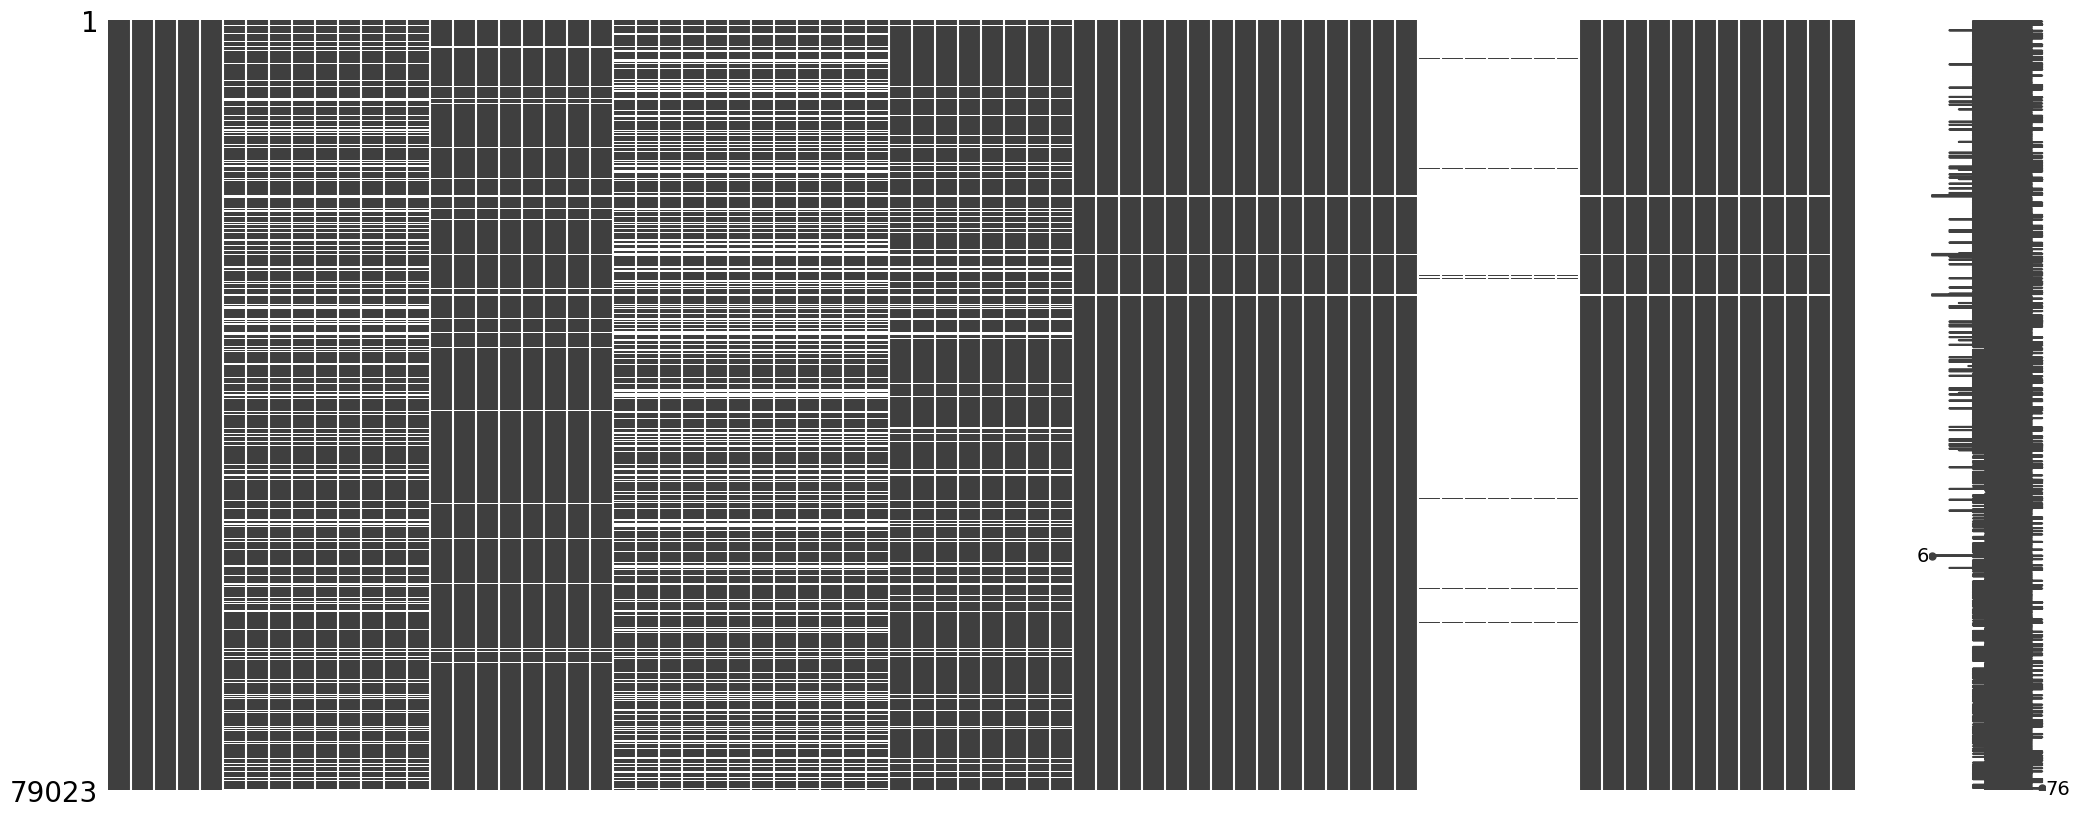

In [4]:
msno.matrix(df)

In [5]:
df.drop('ID_LAT_LON_YEAR_WEEK',axis=1,inplace=True)

In [6]:
df.drop(['UvAerosolLayerHeight_aerosol_height',
'UvAerosolLayerHeight_aerosol_pressure',
'UvAerosolLayerHeight_aerosol_optical_depth',
'UvAerosolLayerHeight_sensor_zenith_angle',  
'UvAerosolLayerHeight_sensor_azimuth_angle', 
'UvAerosolLayerHeight_solar_azimuth_angle',  
'UvAerosolLayerHeight_solar_zenith_angle'],axis=1,inplace=True)

In [7]:
df.describe()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023.000000,79023.000000,79023.000000,79023.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,...,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,79023.000000
mean,-1.891072,29.880155,2020.000000,26.000000,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,5592.377478,59420.297456,4670.430869,19.139241,0.271460,-10.784832,40.436976,-86.800583,27.925981,81.940552
std,0.694522,0.810375,0.816502,15.297155,0.000272,0.185382,0.000206,0.071364,64.263368,14.149950,...,1428.503002,9051.163609,1359.251583,13.547047,0.049434,30.374462,6.428216,37.837269,4.403835,144.299648
min,-3.299000,28.228000,2019.000000,0.000000,-0.000996,0.241822,-0.000887,0.000000,-179.537059,0.099237,...,1050.661782,24779.033704,1050.496816,1.844529,0.017697,-102.739731,2.998873,-153.464211,10.818288,0.000000
25%,-2.451000,29.262000,2019.000000,13.000000,-0.000096,0.705817,-0.000078,0.110535,-56.782383,28.844520,...,4595.400519,53175.779928,3680.856344,9.974574,0.241453,-30.309170,35.829907,-125.991158,24.686763,9.797995
50%,-1.882000,29.883000,2020.000000,26.000000,0.000024,0.809118,0.000019,0.161855,-12.441726,37.784299,...,5573.854309,59332.532548,4621.755170,15.130688,0.272747,-12.673914,41.119630,-84.644352,28.333630,45.593445
75%,-1.303000,30.471000,2021.000000,39.000000,0.000153,0.942792,0.000121,0.211824,72.059990,47.634875,...,6542.303642,65663.842684,5572.983223,23.785030,0.302892,9.402202,44.446272,-48.132701,31.499883,109.549595
max,-0.510000,31.532000,2021.000000,52.000000,0.004191,1.885239,0.004236,0.299998,122.095200,66.242012,...,12384.239458,89291.615576,11384.239458,250.000000,0.736514,78.223037,65.951248,-22.653170,42.060436,3167.768000


In [8]:
df.skew()

latitude                                                    -0.025052
longitude                                                    0.005806
year                                                         0.000000
week_no                                                      0.000000
SulphurDioxide_SO2_column_number_density                     2.387599
SulphurDioxide_SO2_column_number_density_amf                 0.754174
SulphurDioxide_SO2_slant_column_number_density               2.543660
SulphurDioxide_cloud_fraction                               -0.259305
SulphurDioxide_sensor_azimuth_angle                         -0.100563
SulphurDioxide_sensor_zenith_angle                          -0.258991
SulphurDioxide_solar_azimuth_angle                          -0.170244
SulphurDioxide_solar_zenith_angle                           -0.316316
SulphurDioxide_SO2_column_number_density_15km                2.761070
CarbonMonoxide_CO_column_number_density                      1.040585
CarbonMonoxide_H2O_c

In [9]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum()
    sum['missing%'] = (df.isna().sum().values*100)/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    #sum['skew'] = df.skew().values
    desc = pd.DataFrame(df.describe().T)
    sum['min'] = desc['min']
    sum['max'] = desc['max']
    sum['mean'] = desc['mean']
    return sum

summary(df).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,uniques,count,min,max,mean
latitude,float64,0,0.000000,452,79023,-3.299000,-0.510000,-1.891072
longitude,float64,0,0.000000,453,79023,28.228000,31.532000,29.880155
year,int64,0,0.000000,3,79023,2019.000000,2021.000000,2020.000000
week_no,int64,0,0.000000,53,79023,0.000000,52.000000,26.000000
SulphurDioxide_SO2_column_number_density,float64,14609,18.487023,64409,64414,-0.000996,0.004191,0.000048
SulphurDioxide_SO2_column_number_density_amf,float64,14609,18.487023,64411,64414,0.241822,1.885239,0.834848
SulphurDioxide_SO2_slant_column_number_density,float64,14609,18.487023,64409,64414,-0.000887,0.004236,0.000035
SulphurDioxide_cloud_fraction,float64,14609,18.487023,62367,64414,0.000000,0.299998,0.158418
SulphurDioxide_sensor_azimuth_angle,float64,14609,18.487023,64295,64414,-179.537059,122.095200,-7.925870
SulphurDioxide_sensor_zenith_angle,float64,14609,18.487023,64218,64414,0.099237,66.242012,37.436189


In [10]:
df.fillna(df.median(),inplace=True)

In [11]:
df.isna().sum()

latitude                                                    0
longitude                                                   0
year                                                        0
week_no                                                     0
SulphurDioxide_SO2_column_number_density                    0
SulphurDioxide_SO2_column_number_density_amf                0
SulphurDioxide_SO2_slant_column_number_density              0
SulphurDioxide_cloud_fraction                               0
SulphurDioxide_sensor_azimuth_angle                         0
SulphurDioxide_sensor_zenith_angle                          0
SulphurDioxide_solar_azimuth_angle                          0
SulphurDioxide_solar_zenith_angle                           0
SulphurDioxide_SO2_column_number_density_15km               0
CarbonMonoxide_CO_column_number_density                     0
CarbonMonoxide_H2O_column_number_density                    0
CarbonMonoxide_cloud_height                                 0
CarbonMo

In [15]:
x=df.drop(['emission'],axis=1)
y=df['emission']

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=12)

In [29]:
def reg_metrics(actual,pred):
    r2=r2_score(actual,pred)
    mse=mean_squared_error(actual,pred)
    mae=mean_absolute_error(actual,pred)
    rmse=mean_squared_error(actual,pred,squared=False)
    print('R^2 Error : ',round(r2,4))
    print('MSE  : ',round(mse,4))
    print('MAE  : ',round(mae,4))
    print('RMSE : ',round(rmse,4))
    print('\n')

In [20]:
le=LinearRegression()
le.fit(xtrain,ytrain)
train_lr=le.predict(xtrain)
test_lr=le.predict(xtest)
reg_metrics(ytrain,train_lr)
reg_metrics(ytest,test_lr)

R^2 Error :  0.0298
MSE  :  19640.9502
MAE  :  68.7506
RMSE :  140.1462
R^2 Error :  0.0246
MSE  :  22561.7861
MAE  :  69.789
RMSE :  150.2058


In [25]:
las=Lasso(alpha=0.3)
las.fit(xtrain,ytrain)
train_las=las.predict(xtrain)
test_las=las.predict(xtest)
reg_metrics(ytrain,train_las)
reg_metrics(ytest,test_las)

R^2 Error :  0.0182
MSE  :  22709.7309
MAE  :  70.5871
RMSE :  150.6975


In [27]:
Rid=Ridge(alpha=0.5,solver='svd')
Rid.fit(xtrain,ytrain)
train_rid=Rid.predict(xtrain)
test_rid=Rid.predict(xtest)
reg_metrics(ytrain,train_rid)
reg_metrics(ytest,test_rid)

R^2 Error :  0.0286
MSE  :  19665.8571
MAE  :  68.8703
RMSE :  140.235
R^2 Error :  0.0232
MSE  :  22595.9364
MAE  :  69.9048
RMSE :  150.3194


In [30]:
dtree=DecisionTreeRegressor(max_depth=5,min_samples_split=6,min_samples_leaf=20)
dtree.fit(xtrain,ytrain)
pred_train_dtree=dtree.predict(xtrain)
pred_test_dtree=dtree.predict(xtest)
reg_metrics(ytrain,pred_train_dtree)
reg_metrics(ytest,pred_test_dtree)


R^2 Error :  0.5623
MSE  :  8861.4582
MAE  :  52.0616
RMSE :  94.1353


R^2 Error :  0.5513
MSE  :  10378.7696
MAE  :  52.3246
RMSE :  101.8762




In [75]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
               'max_depth': [7,8,10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
               'min_samples_leaf': [1, 2, 4,6,8,10],
               'min_samples_split': [2,3,4, 5, 10,6],
               'n_estimators': [80,100,120,140,160,180,200]}

In [ ]:
rf=RandomForestRegressor()
clf=RandomizedSearchCV(rf,random_grid,random_state=123,verbose=2)
search=clf.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [33]:
rf=RandomForestRegressor(n_estimators=50,max_depth=8)
rf.fit(xtrain,ytrain)
pred_train_rf=rf.predict(xtrain)
pred_test_rf=rf.predict(xtest)
reg_metrics(ytrain,pred_train_rf)
reg_metrics(ytest,pred_test_rf)

R^2 Error :  0.7448
MSE  :  5165.5367
MAE  :  38.5962
RMSE :  71.8717


R^2 Error :  0.7244
MSE  :  6375.1507
MAE  :  39.3745
RMSE :  79.8445




In [34]:
gb=GradientBoostingRegressor()
gb.fit(xtrain,ytrain)
pred_train_gb=gb.predict(xtrain)
pred_test_gb=gb.predict(xtest)
reg_metrics(ytrain,pred_train_gb)
reg_metrics(ytest,pred_test_gb)

R^2 Error :  0.7955
MSE  :  4139.7353
MAE  :  41.6981
RMSE :  64.3408


R^2 Error :  0.809
MSE  :  4417.7897
MAE  :  41.9872
RMSE :  66.4665




In [ ]:
xgb=xgboost.XGBRegressor()
xgb.fit(xtrain,ytrain)
train_xgb=xgb.predict(xtrain)
test_xgb=xgb.predict(xtest)

In [37]:
reg_metrics(ytrain,train_xgb)
reg_metrics(ytest,test_xgb)

R^2 Error :  0.9859
MSE  :  285.2109
MAE  :  10.433
RMSE :  16.8882


R^2 Error :  0.9786
MSE  :  493.9187
MAE  :  12.2005
RMSE :  22.2243




In [67]:
ada=AdaBoostRegressor(n_estimators=150)
ada.fit(xtrain,ytrain)
train_ada=ada.predict(xtrain)
test_ada=ada.predict(xtest)
reg_metrics(ytrain,train_ada)
reg_metrics(ytest,test_ada)

R^2 Error :  0.6477
MSE  :  7132.2323
MAE  :  64.27
RMSE :  84.4525


R^2 Error :  0.6902
MSE  :  7165.9105
MAE  :  63.7106
RMSE :  84.6517




In [69]:
svr=SVR(C=1.8,kernel='poly',degree=30)
svr.fit(xtrain,ytrain)
train_svr=svr.predict(xtrain)
test_svr=svr.predict(xtest)
reg_metrics(ytrain,train_svr)
reg_metrics(ytest,test_svr)

R^2 Error :  -0.0656
MSE  :  21572.0357
MAE  :  66.8283
RMSE :  146.8742


R^2 Error :  -0.0612
MSE  :  24547.4098
MAE  :  67.7337
RMSE :  156.6761




In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24353 entries, 0 to 24352
Data columns (total 75 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      24353 non-null  object 
 1   latitude                                                  24353 non-null  float64
 2   longitude                                                 24353 non-null  float64
 3   year                                                      24353 non-null  int64  
 4   week_no                                                   24353 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  18211 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              18211 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            18211 non-null  float64
 8   SulphurDioxide_c

In [41]:
df_test.drop(['UvAerosolLayerHeight_aerosol_height',
'UvAerosolLayerHeight_aerosol_pressure',
'UvAerosolLayerHeight_aerosol_optical_depth',
'UvAerosolLayerHeight_sensor_zenith_angle',  
'UvAerosolLayerHeight_sensor_azimuth_angle', 
'UvAerosolLayerHeight_solar_azimuth_angle',  
'UvAerosolLayerHeight_solar_zenith_angle'],axis=1,inplace=True)

In [43]:
df_test.fillna(df.median(),inplace=True)

In [44]:
df_test.shape

(24353, 68)

In [56]:
prediction=pd.DataFrame(columns=['ID_LAT_LON_YEAR_WEEK'],data=df_test['ID_LAT_LON_YEAR_WEEK'])

In [57]:
prediction.head()

,ID_LAT_LON_YEAR_WEEK
0,ID_-0.510_29.290_2022_00
1,ID_-0.510_29.290_2022_01
2,ID_-0.510_29.290_2022_02
3,ID_-0.510_29.290_2022_03
4,ID_-0.510_29.290_2022_04


In [58]:
df_test.drop('ID_LAT_LON_YEAR_WEEK',inplace=True,axis=1)